# Marginal Plot

## Подготовка


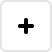
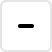
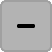
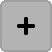
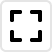
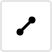
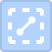
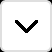
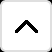
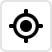

In [1]:
import pandas as pd

from lets_plot import *
LetsPlot.setup_html()

In [2]:
class marginal_plot:

    DEF_WIDTH = 640
    DEF_HEIGHT = 480
    DEF_RATIO = .2

    def __init__(self, _data, _aes):
        self.data = _data
        self.aes = _aes

        self.central_plot = None
        self.marginal_plots = {}
        self.width = self.DEF_WIDTH
        self.height = self.DEF_HEIGHT
        self.ratio = self.DEF_RATIO

    def central(self, _aes=None, geom='point', **kwargs):
        if geom == 'point':
            self.central_plot = geom_point(_aes, **kwargs)
        elif geom == 'bin2d':
            self.central_plot = geom_bin2d(_aes, **kwargs)
        elif geom == 'density2d':
            self.central_plot = geom_density2d(_aes, **kwargs)
        elif geom == 'density2df':
            self.central_plot = geom_density2df(_aes, **kwargs)

        return self

    def marginal(self, geom='density', side=["top", "right"], **kwargs):
        if type(side) == str:
            side = [side]
        for s in side:
            if geom == 'density':
                _aes = aes(x=self.aes.as_dict()["y"]) if s == "left" or s == "right" else aes(x=self.aes.as_dict()["x"])
                self.marginal_plots[s] = geom_density(_aes, **kwargs)
            elif geom == 'histogram':
                _aes = aes(x=self.aes.as_dict()["y"]) if s == "left" or s == "right" else aes(x=self.aes.as_dict()["x"])
                self.marginal_plots[s] = geom_histogram(_aes, **kwargs)
            elif geom == 'area':
                _aes = aes(x=self.aes.as_dict()["y"]) if s == "left" or s == "right" else aes(x=self.aes.as_dict()["x"])
                self.marginal_plots[s] = geom_area(_aes, stat='bin', **kwargs)
            elif geom == 'freqpoly':
                _aes = aes(x=self.aes.as_dict()["y"]) if s == "left" or s == "right" else aes(x=self.aes.as_dict()["x"])
                self.marginal_plots[s] = geom_freqpoly(_aes, **kwargs)
            elif geom == 'boxplot':
                _aes = aes(y=self.aes.as_dict()["y"]) if s == "left" or s == "right" else aes(y=self.aes.as_dict()["x"])
                self.marginal_plots[s] = geom_boxplot(_aes, **kwargs)
            elif geom == 'violin':
                _aes = aes(y=self.aes.as_dict()["y"]) if s == "left" or s == "right" else aes(y=self.aes.as_dict()["x"])
                self.marginal_plots[s] = geom_violin(_aes, **kwargs)
            if (s == "left" or s == "right") and not geom in ["boxplot", "violin"]:
                self.marginal_plots[s] = self.marginal_plots[s] + coord_flip()
            if (s == "top" or s == "bottom") and geom in ["boxplot", "violin"]:
                self.marginal_plots[s] = self.marginal_plots[s] + coord_flip()

        return self

    def sizes(self, width=DEF_WIDTH, height=DEF_HEIGHT, ratio=DEF_RATIO):
        self.width = width
        self.height = height
        self.ratio = ratio

        return self

    def build(self):
        cp_width, cp_height = self._get_central_plot_size()
        cp_left, cp_top = self._get_central_plot_pos()
        mp_width = int(self.width * self.ratio)
        mp_height = int(self.height * self.ratio)
               
        bunch = GGBunch()
        bunch.add_plot(ggplot(self.data, self.aes) + self.central_plot, cp_left, cp_top, cp_width, cp_height)
        if "left" in self.marginal_plots.keys():
            bunch.add_plot(ggplot(self.data) + self.marginal_plots["left"],
                           0, cp_top, mp_width, cp_height)
        if "right" in self.marginal_plots.keys():
            bunch.add_plot(ggplot(self.data) + self.marginal_plots["right"],
                           self.width - mp_width, cp_top, mp_width, cp_height)
        if "top" in self.marginal_plots.keys():
            bunch.add_plot(ggplot(self.data) + self.marginal_plots["top"],
                           cp_left, 0, cp_width, mp_height)
        if "bottom" in self.marginal_plots.keys():
            bunch.add_plot(ggplot(self.data) + self.marginal_plots["bottom"],
                           cp_left, self.height - mp_height, cp_width, mp_height)

        return bunch.show()

    def _get_central_plot_size(self):
        mwc = int("left" in self.marginal_plots.keys()) + int("right" in self.marginal_plots.keys())
        mhc = int("top" in self.marginal_plots.keys()) + int("bottom" in self.marginal_plots.keys())

        return (
            int(self.width * (1 - mwc * self.ratio)),
            int(self.height * (1 - mhc * self.ratio)),
        )

    def _get_central_plot_pos(self):
        mlc = int("left" in self.marginal_plots.keys())
        mtc = int("top" in self.marginal_plots.keys())

        return (
            int(self.width * mlc * self.ratio),
            int(self.height * mtc * self.ratio),
        )

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
df.head()

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## Демонстрация API

In [4]:
marginal_plot(df, aes("cty", "hwy")).central().marginal().build()

In [5]:
marginal_plot(df, aes("cty", "hwy")).central(geom='bin2d', show_legend=False)\
                                    .marginal(geom='histogram', side="right")\
                                    .sizes(width=800, height=600)\
                                    .build()

In [6]:
marginal_plot(df, aes("cty", "hwy")).central(shape=21, color='#54278f', fill='#cbc9e2', size=4)\
                                    .marginal(geom='boxplot', side=["top", "right"], color='#54278f', fill='#cbc9e2')\
                                    .marginal(geom='violin', side=["left", "bottom"], color='#54278f', fill='#cbc9e2')\
                                    .sizes(width=800, height=600, ratio=.1)\
                                    .build()